### Question 1 : Implement the intensity transformation

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread("a1images/emma.jpg",cv.IMREAD_GRAYSCALE)

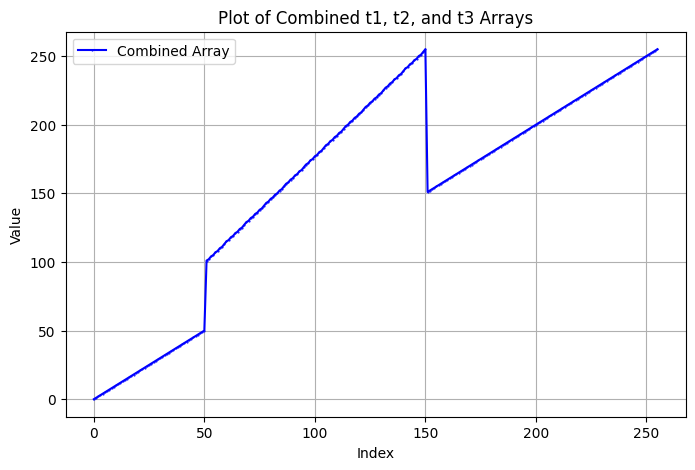

In [6]:
d = np.array([(50,50),(50,100),(150,255),(150,150)])

t1= np.linspace(0,d[0,1],d[0,0]+1).astype(np.uint8)         
t2= np.linspace(d[1,1]+1,d[2,1],d[2,0]-d[1,0]).astype(np.uint8)     
t3= np.linspace(d[3,1]+1,255,255-d[3,0]).astype(np.uint8)       


transformation = np.concatenate((t1,t2,t3)).astype(np.uint8)
# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(transformation, label='Combined Array', color='b', marker='.', markersize=1)
plt.title('Plot of Combined t1, t2, and t3 Arrays')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

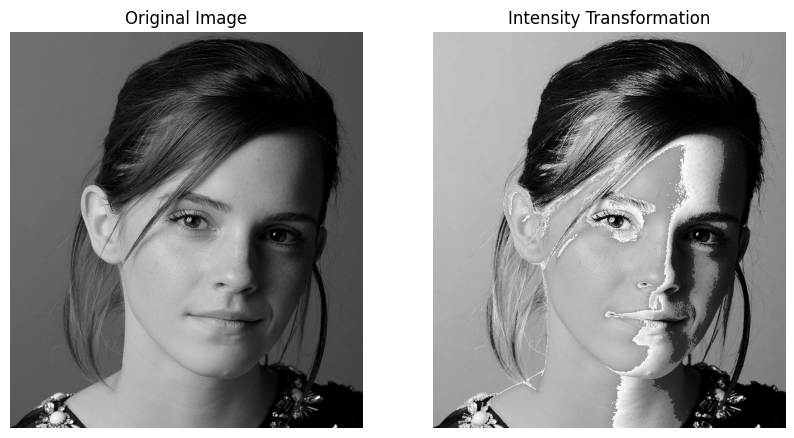

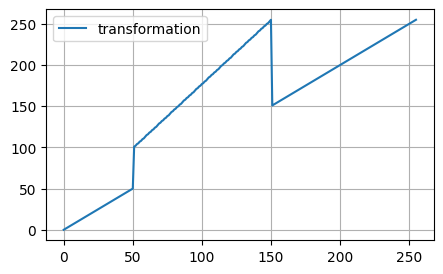

In [10]:
image_transformed = cv.LUT(img,transformation)
fig1,ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(image_transformed,cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformation')
fig2,ax1 = plt.subplots(1, 1, figsize=(5, 3))
ax1.plot(transformation, label='transformation')
ax1.legend()
# Add grid
ax1.grid(True)
# Ensure layout is tight
for a in ax:
    a.axis('off')
plt.show()

### Question 2 :Applying internsity transformation for brain proton density image

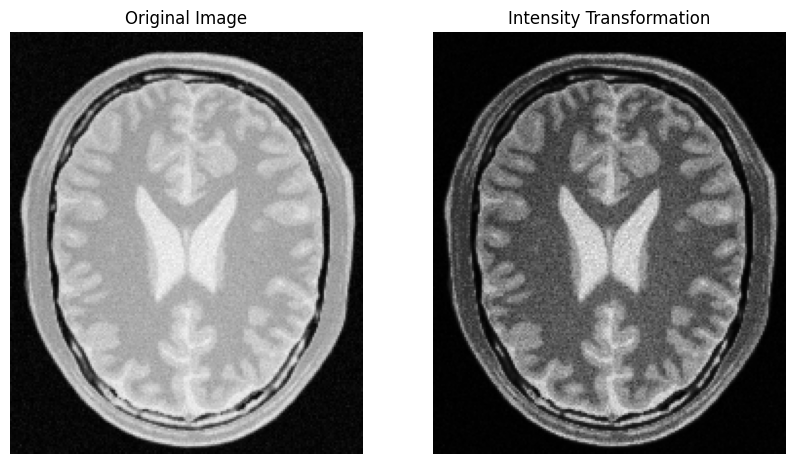

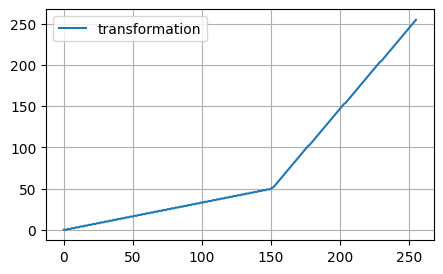

In [12]:
f = cv.imread("a1images/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)

d = np.array([(150,50)])

t1= np.linspace(0,d[0,1],d[0,0]+1).astype(np.uint8)             
t2= np.linspace(d[0,1]+1,255,255-d[0,0]).astype(np.uint8)       


transformation = np.concatenate((t1,t2)).astype(np.uint8)
image_transformed = cv.LUT(f,transformation)
fig1,ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(image_transformed,cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformation')
fig2,ax1 = plt.subplots(1, 1, figsize=(5, 3))
ax1.plot(transformation, label='transformation')
ax1.legend()
# Add grid
ax1.grid(True)
# Ensure layout is tight
for a in ax:
    a.axis('off')
plt.show()

## Question 3 

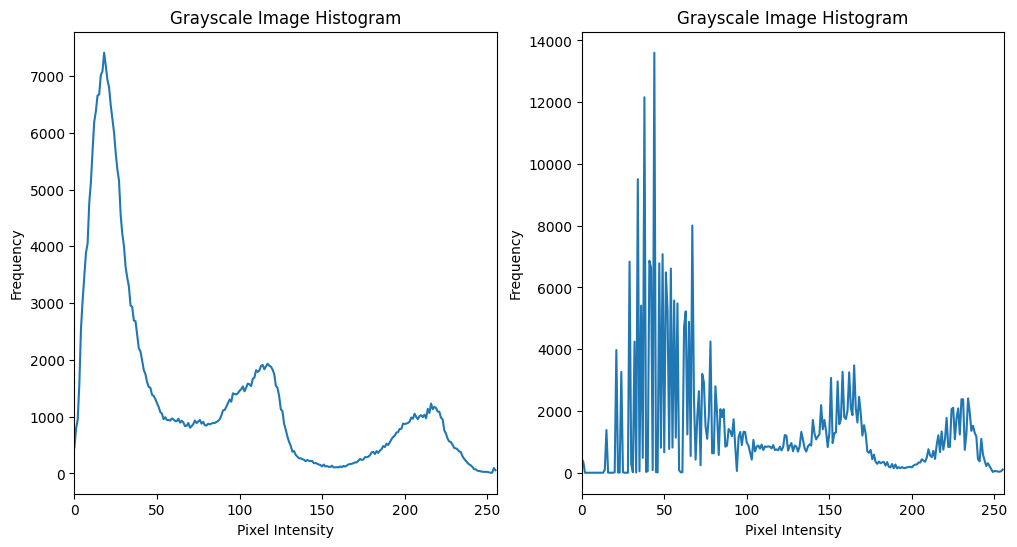

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'a1images/highlights_and_shadows.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Split LAB into L, A, and B channels
L, A, B = cv2.split(lab_image)

# Gamma correction parameters
gamma = 1.8
gamma_correction = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")

# Apply gamma correction to the L channel
L_corrected = cv2.LUT(L, gamma_correction)

# Merge the corrected L channel back with A and B
lab_corrected = cv2.merge([L_corrected, A, B])

# Convert the corrected LAB image back to BGR color space
corrected_image = cv2.cvtColor(lab_corrected, cv2.COLOR_Lab2BGR)

# Display the original and gamma-corrected images
cv2.imshow('Original Image', image)
cv2.imshow('Gamma Corrected Image', corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
corrected_image_grayscale = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2GRAY) 


# Plot histograms
plt.figure(figsize=(12, 6))
# Calculate histogram using OpenCV's calcHist function
histogram1 = cv2.calcHist([image_grayscale], [0], None, [256], [0, 256])
histogram2 = cv2.calcHist([corrected_image_grayscale], [0], None, [256], [0, 256])

# Plot the histogram
plt.subplot(1, 2, 1)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(histogram1)
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.title('Gamma corrected Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(histogram2)
plt.xlim([0, 256])


plt.show()



 
plt.show()


## Question 4 

In [39]:
# Load the image
image_path = 'a1images/spider.png'
image = cv2.imread(image_path)

# Convert the image from BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into H, S, and V channels
H, S, V = cv2.split(hsv_image)

In [44]:
print(H.shape)
a=0.4
sigma = 70
S1 = np.minimum(S + a * 128 * np.exp(-(S - 128)**2 / (2 * sigma**2)), 255)
S1 = S1.astype(np.uint8)

(438, 780)


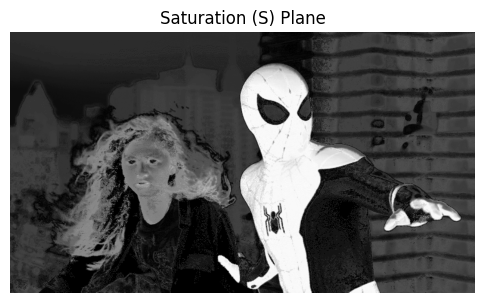

In [45]:
# Plot the S channel (Saturation plane)
plt.figure(figsize=(6, 6))
plt.imshow(S, cmap='gray')  # Display the H channel as a grayscale image
plt.title('Saturation (S) Plane')
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()

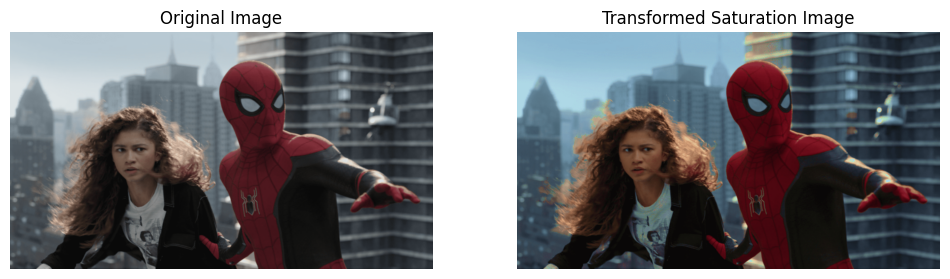

In [46]:

# Combine the transformed H channel with the original S and V channels
transformed_hsv_image = cv2.merge([H, S1, V])

# Convert the transformed HSV image back to BGR color space
transformed_image = cv2.cvtColor(transformed_hsv_image, cv2.COLOR_HSV2BGR)

# Display the original and transformed images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Saturation Image')
plt.axis('off')

plt.show()

In [47]:
t = np.arange(256, dtype=np.uint8)
g = np.minimum(t + a * 128 * np.exp(-(t - 128)**2 / (2 * sigma**2)), 255)


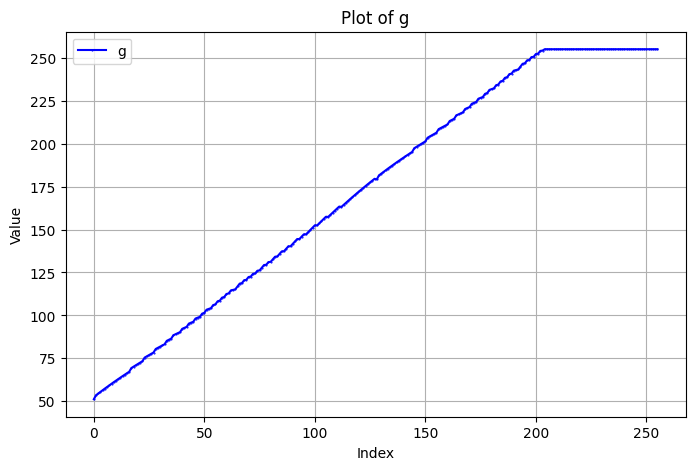

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(g, label='g', color='b', marker='.', markersize=1)
plt.title('Plot of g')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()